2. Draw an ANN using the original artiﬁcial neurons (like the ones in Figure 10-3) that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B).

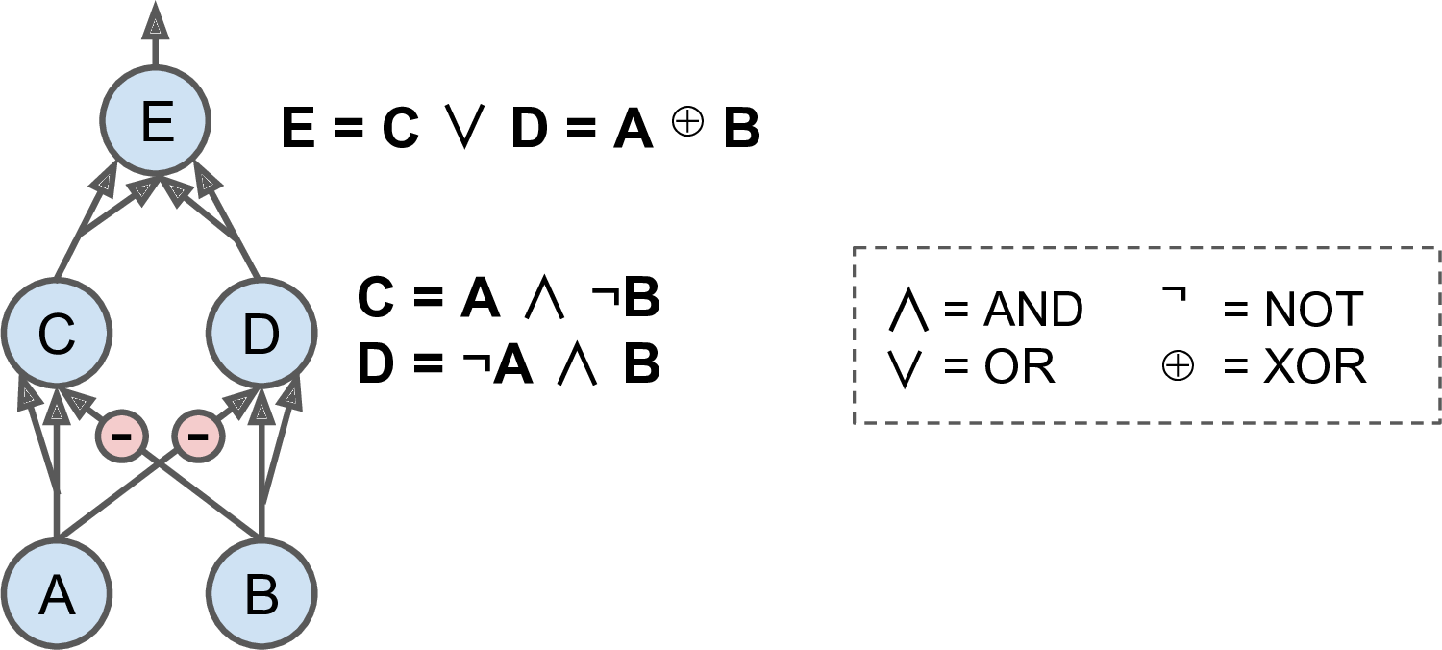

3. Why is it generally preferable to use a logistic regression classiﬁer rather than a classic perceptron (i.e., a single layer of threshold logic units trained using the perceptron training algorithm)? How can you tweak a perceptron to make it equivalent to a logistic regression classiﬁer?

    A classical Perceptron will converge only if the dataset is linearly separable, abd it does not output a class probability. Moreover, perceptrons do not use any regularization by default, and training stops as soon as there are no more prediction errors on the training set, so the model typically does not generalize as well as logistic regression or a linear SVM classiﬁer.
    
    If you change the Perceptron's activation function to the sigmoid activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier.

4. Why was the sigmoid activation function a key ingredient in training the ﬁrst MLPs?
        
    The sigmoid activation function was a key ingredient in training the first MLPs because its derivative is always nonzero, so Gradient Descent can always roll down the slope. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all.
        

5. Name three popular activation functions. Can you draw them?

    Heaveside, ReLU, Sigmoid, Tanh

6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artiﬁcial neurons, and ﬁnally one output layer with 3 artiﬁcial neurons. All artiﬁcial neurons use the ReLU activation function.

    a. What is the shape of the input matrix X?
        batch size * 10 columns
        
       
    b. What are the shapes of the hidden layer’s weight matrix W<sub>h</sub> and bias vector b<sub>h</sub>?
    
        W<sub>h</sub> : 10 * 50
        b<sub>h</sub> : 50
        
        
    c. What are the shapes of the output layer’s weight matrix W<sub>o</sub> and bias vector b<sub>o</sub>?
        W<sub>o</sub>: 50 * 3
        b<sub>o</sub>: 3
        
        
    d. What is the shape of the network’s output matrix Y?
        batch size * 3 columns
        
        
    e. Write the equation that computes the network’s output matrix Y as a function of X, W<sub>h</sub>, b<sub>h</sub>, W<sub>o</sub>, and b<sub>o</sub>.
        Y = ReLU(ReLU(X W<sub>h</sub> + b<sub>h</sub>)W<sub>o</sub> + b<sub>o</sub>)
        

7. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use? What about for getting your network to predict housing prices, as in Chapter 2?

    * Spam classification: 1 neuron, sigmoid
    * MNIST: 1 neuron per class, softmax
    * Housing prices: 1 neuron, no activation function

8. What is backpropagation and how does it work? What is the diﬀerence between backpropagation and reversemode autodiﬀ?
    
    Backpropagation is a technique used to train artificial neural networks. It first computes the gradients of the cost function with regard to every model parameter (all the weights and biases), then it performs a Gradient Descent step using these gradients. This backpropagation step is typically performed thousands or millions of times, using many training batches, until the model parameters converge to values that (hopefully) minimize the cost function.
    
    To compute the gradients, backpropagation uses reverse-mode autodiff (although it wasn't called that when backpropagation was invented, and it has been reinvented several times). Reverse-mode autodiff performs a forward pass through a computation graph, computing every node's value for the current training batch, and then it performs a reverse pass, computing all the gradients at once (see Appendix B for more details).
    
    So what's the difference? Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. In contrast, reverse-mode autodiff is just a technique to compute gradients efficiently, and it happens to be used by backpropagation.

9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overﬁts the training data, how could you tweak these hyperparameters to try to solve the problem?

    Number of hidden layers, number of neurons per hidden layer, learning rate, batch size, optimizer, activation function, number of iterations.
    
    In general, the ReLU activation function (or one of its variants; see Chapter 11) is a good default for the hidden layers. For the output layer, in general you will want the sigmoid activation function for binary classification, the softmax activation function for multiclass classification, or no activation function for regression. If the MLP overfits the training data, you can try reducing the number of hidden layers and reducing the number of neurons per hidden layer.

10. Train a deep MLP on the MNIST dataset (you can load it using tf.keras.datasets.mnist.load_data()). See if you can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and ﬁnding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

mnist = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
X_train.shape

(55000, 28, 28)

In [3]:
X_train.dtype

dtype('float64')

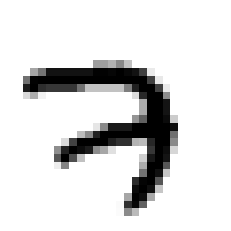

In [4]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# n_rows = 4
# n_cols = 10
# plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
# for row in range(n_rows):
#     for col in range(n_cols):
#         index = n_cols * row + col
#         plt.subplot(n_rows, n_cols, index + 1)
#         plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
#         plt.axis('off')
#         plt.title(y_train[index])
# plt.subplots_adjust(wspace=0.2, hspace=0.5)

# plt.show()

In [7]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

2022-11-28 01:27:44.460354: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [11]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

2022-11-28 01:27:45.020961: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1719/1719 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.5733 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

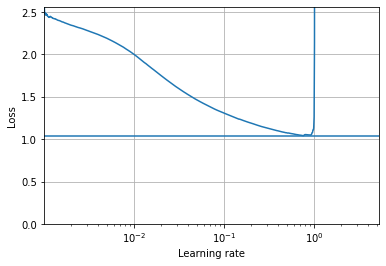

In [12]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [13]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

2022-11-28 01:27:56.280468: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-28 01:27:56.281069: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-28 01:27:56.282319: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/100
  53/1719 [..............................] - ETA: 6s - loss: 1.1789 - accuracy: 0.6309

2022-11-28 01:27:56.712765: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-28 01:27:56.712982: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-28 01:27:56.717582: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-28 01:27:56.723597: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-28 01:27:56.736003: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_mnist_logs/run_001/train/plugins/profile/2022_11_28_01_27_56

2022-11-28 01:27:56.736941: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to my_mnist_logs/run_001/train/plugins/profile/2022_11_28_01_27_56/f2c0e331b011.trace.json.gz
2022-11-28 01:27:56.751086: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_mnist_logs/run_001/train/plugins/profile

1719/1719 [==============================] - 6s 4ms/step - loss: 0.2356 - accuracy: 0.9263 - val_loss: 0.0995 - val_accuracy: 0.9724


2022-11-28 01:28:03.083306: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0942 - accuracy: 0.9707 - val_loss: 0.0996 - val_accuracy: 0.9708
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0655 - accuracy: 0.9793 - val_loss: 0.0753 - val_accuracy: 0.9772
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0815 - val_accuracy: 0.9784
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0739 - val_accuracy: 0.9798
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0676 - val_accuracy: 0.9826
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0829 - val_accuracy: 0.9792
Epoch 8/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0904 - val_ac

In [14]:
model = tf.keras.models.load_model("my_mnist_model") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9799


[0.07312726229429245, 0.9799000024795532]

In [15]:
%pip install -q -U tensorboard-plugin-profile

Note: you may need to restart the kernel to use updated packages.


In [16]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
%tensorboard --logdir=./my_mnist_logs

2022-11-28 01:30:41.628006: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-28 01:30:41.628077: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-28 01:30:41.628918: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
UsageError: Line magic function `%tensorboard` not found.
